<a href="https://colab.research.google.com/github/lacykaltgr/ait-assessments/blob/main/07_AIT_CNN_pretrained_model_Keras_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
You may use and modify this code for research and development purpuses.
Using this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.

The documentation of Keras was used to create this notebook: https://keras.io/applications/

Copyright (c) 2023 Bálint Gyires-Tóth - All Rights Reserved
</PRE>

## Inference with a pretrained neural network
In this notebook we will load a convolutional neural network that was pretrained on the Imagenet dataset and make inference with it.

In [35]:
import os
from urllib.request import urlretrieve
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

Loading the Inception V3 or ResNet50 model, that was pretrained on Imagenet. 


In [36]:
model_inception = InceptionV3(weights='imagenet', include_top=True)
model_resnet = ResNet50(weights='imagenet', include_top=True)

102967424/102967424 [==============================] - 0s 0us/step


## Exercise

Let's download an arbitrary photo from the internet with Python code or manually (and upload it to Colab).

In [54]:
url_image= "https://picsum.photos/id/237/200/300"
urlretrieve(url_image, "image.jpg")

('image.jpg', <http.client.HTTPMessage at 0x7fba285b4250>)

Preparing the photo for the neural network:

In [55]:
img_path = 'image.jpg'
img_inception = image.load_img(img_path, target_size=(299, 299, 3)) # The size of the input should match the predefined input size for Inception V3 
img_resnet = image.load_img(img_path, target_size=(224, 224, 3)) 

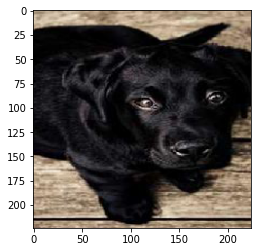

In [56]:
import matplotlib.pyplot as plt
plt.imshow(img_resnet)
plt.show()

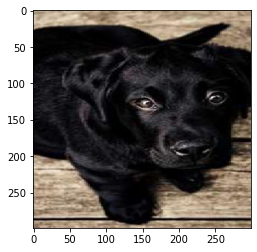

In [57]:
plt.imshow(img_inception)
plt.show()

In [58]:
x_inception = image.img_to_array(img_inception)
x_inception = np.expand_dims(x_inception, axis=0) # add one more dimension to the 0 axis, eg. with expand_dims or reshape
x_inception = preprocess_input(x_inception)

x_resnet = image.img_to_array(img_resnet)
x_resnet = np.expand_dims(x_resnet, axis=0) # add one more dimension to the 0 axis, eg. with expand_dims or reshape
x_resnet = preprocess_input(x_resnet)

Make a prediction:

In [59]:
preds_inception = model_inception.predict(x_inception)
preds_resnet = model_resnet.predict(x_resnet)

1/1 [==============================] - 0s 207ms/step


And decode the predictions to actual classes:

In [60]:
print('Predicted class:')
print(decode_predictions(preds_inception))
print(decode_predictions(preds_resnet))

Predicted class:
[[('n06359193', 'web_site', 1.0), ('n15075141', 'toilet_tissue', 0.0), ('n02319095', 'sea_urchin', 0.0), ('n02391049', 'zebra', 0.0), ('n02389026', 'sorrel', 0.0)]]
[[('n02099712', 'Labrador_retriever', 0.44448316), ('n02093256', 'Staffordshire_bullterrier', 0.30785745), ('n02105412', 'kelpie', 0.07363348), ('n02093428', 'American_Staffordshire_terrier', 0.031987928), ('n02112706', 'Brabancon_griffon', 0.017496139)]]
